# **22차시:과적합 방지 전략**
## 🔍 **학습목표**
- 과적합의 개념과 발생 원인을 이해할 수 있다.  
- **Dropout**을 적용하여 신경망의 복잡도를 줄이고 일반화 성능을 향상시킬 수 있다.  
- **EarlyStopping**·**ModelCheckpoint**를 활용하여 최적의 모델을 확보한다.

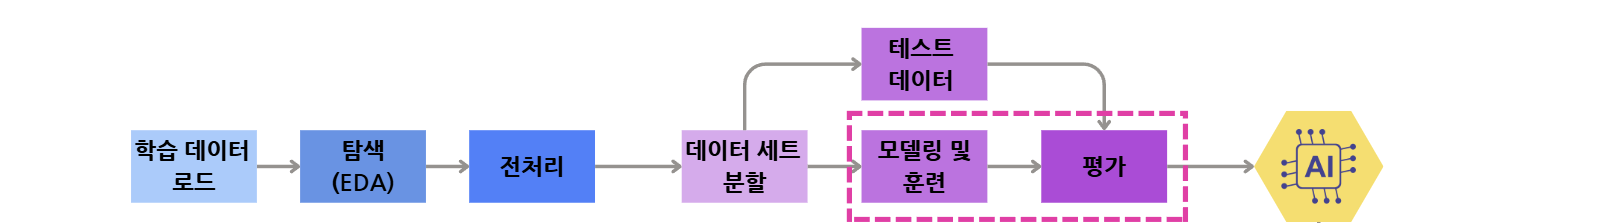


## **📌 과소적합(Underffiting) vs 과적합(Overfitting)**


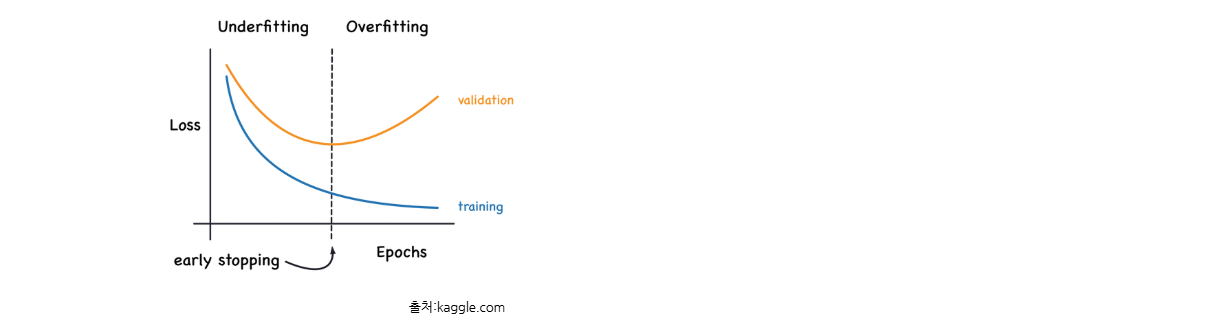

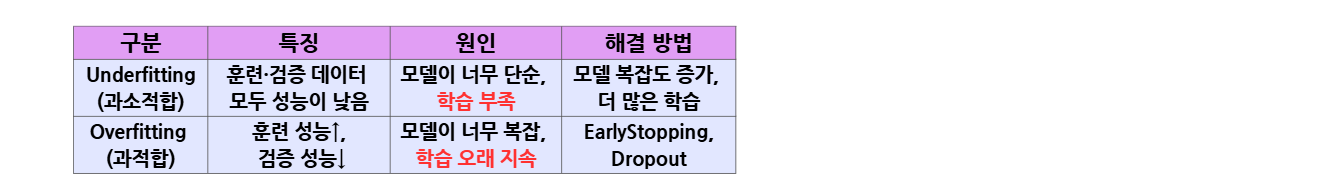

## **✅ Dropout(드롭아웃)**
- **정의**: 학습 과정에서 무작위로 일부 뉴런을 비활성화하여 과적합을 방지하는 기법  
- **효과**: 특정 뉴런에 의존하는 것을 막고, 신경망이 더 일반화된 특징을 학습하도록 유도  

- <img src='https://miro.medium.com/1*i4rt07DgUu9Y01oKQkp2wQ.gif' width=320> <br>[출처]Medium:Deep Neural Network using TensorFlow  

- **중요 매개변수**
  - rate: 비활성화할 뉴런의 비율 (0.0 ~ 1.0 사이 값)

    ```python
    # 은닉층에 Dropout을 적용
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=[X_train.shape[1]]))
    model.add(Dropout(0.5)) # 50% 뉴런 무작위 비활성화
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3)) # 30% 뉴런 무작위 비활성화
    model.add(Dense(1, activation='sigmoid'))

    ```

## **✅EarlyStopping: 불필요한 학습은 그만!**
- **정의**: 모니터링 지표(val_loss, val_accuracy 등)가 개선되지 않으면 학습을 중단


- **중요 매개변수**
    - monitor:모니터링할 지표
    - patience: 개선 없을 때 기다릴 epoch 수
    
    ```python
        # val_loss를 지켜보다가 5번 동안 개선이 없으면 학습을 중단
        early_stop = EarlyStopping(
            monitor='val_loss',    # 모니터링 지표
            patience=5,            # 개선 없을 때 기다릴 epoch 수
        )
    ```

## **✅ModelCheckpoint: 최고의 모델만 저장!**
- **정의**: 학습 도중 성능이 가장 좋은 시점의 모델을 자동으로 저장


- **중요 매개변수**
    - monitor : 모니터링할 지표 (예: val_loss, val_accuracy)
    - save_best_only : 가장 좋은 성능일 때만 저장할지 여부
    - filepath : 저장할 파일 이름 및 경로
    
    ```python
        # val_loss를 모니터링하다가 가장 낮을 때의 모델만 저장
        checkpoint = ModelCheckpoint(
            filepath='best_model.h5',   # 저장 파일명
            monitor='val_loss',         # 모니터링 지표
            save_best_only=True         # 최고 성능만 저장 (필수)
        )

    ```

> 👉 **EarlyStopping과 같이 사용하면**
> - EarlyStopping → “쓸데없는 학습 멈추기”
> - ModelCheckpoint → “그중 최고 모델 저장하기”


## **✅Callbacks:학습 관리자**

- **정의**: 학습 과정 중간중간에 개입하여 미리 지정된 작업을 수행하도록 하는 **'이벤트 관리자'**

    ```python
    hist = model.fit(x_train, y_train,
                    epochs=70 ,
                    batch_size=5,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, model_ckpt], #리스트로
                    )

    ```

---

## **📝연습 문제**

### **자장면 가격 예측**

**[데이터 설명: jajang_price.csv]**
- `year`: 기준 연도
- `location`: 식당 위치 (예: Seoul, Busan)
- `restaurant_type`: 식당 유형 (예: Normal, Franchise, Premium)
- `delivery_only`: 배달 전문 여부 (1: Yes, 0: No)
- `special_menu`: 특별 메뉴 여부 (예: Basic, Ganjjajang)
- `cpi`: 소비자물가지수
- `flour_index`: 밀가루물가지수
- `pork_index`: 돼지고기물가지수
- `onion_index`: 양파물가지수
- `minimum_wage`: 해당 연도 최저임금 (시급)
- `coupon_discount`: 쿠폰 할인율 (%)
- **`price`: 자장면 가격 (단위: 원) <== 목적 변수**



### **문제 1. 아래의 지시대로 코드를 실행하시오.**

- 데이터 파일을 읽고 데이터프레임 변수 `df`에 저장하시오.
    - `jajang_price.csv`
- 전처리 진행
    - 결측치는 해당 행을 삭제하시오. (`dropna()`)
    - 오브젝트 타입 컬럼에 대해서는 원-핫 인코딩(`get_dummies`)을 적용하여 수치형으로 변환
- X,y로 분리 후 훈련/검증 데이터로 분할하고 **스케일링을 적용**하시오.
    - 타겟 변수: `price`
    - 설명 변수: `price`를 제외한 나머지 전체 컬럼
    - 테스트 사이즈를 전체 대비 30% 할당, `random_state = 42`
    - `train_test_split` 사용
    - 훈련/검증 데이터 모두 표준화(StandardScaler)를 사용하여 스케일링
    - 결과는 다음 변수에 저장할 것: `X_train_scaled` `X_test_scaled`

In [ ]:
# 정답 코드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 및 전처리
df = pd.read_csv('jajang_price.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# X, y 데이터 분리
X = df.drop('price', axis=1)
y = df['price']

# 훈련/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 스케일링
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### **문제 2. callback을 적용하여 모델을 학습하고, 아래의 질문에 답하시오.**
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 아래와 그림과 같은 아키텍처로 히든 레이어를 구성하시오.
- 입력층은 입력 데이터의 컬럼 수를 지정하시오.
- 출력층은 문제 유형에 맞는 노드 수와 활성화 함수를 지정하시오.
- 학습 하이퍼파라미터:
    - 손실함수: `mse`
    - 옵티마이저: `adam`
    - 평가지표: 평균 제곱 오차 (`mse`)
    - `epochs=200`, `batch_size=32`
    - `validation_data`는 스케일링된 검증 데이터를 사용
- Callbacks 설정:
    - EarlyStopping:
        - `monitor`: 'val_loss'
        - `patience`: 10
        - 변수 `early_stop`에 저장
    - ModelCheckpoint:
        - `filepath`: 'best_jajang_model.keras'
        - `monitor`: 'val_loss'
        - `save_best_only`: True
        - 변수 `model_ckp`에 저장
- 훈련 결과를 `hist` 변수에 저장하시오.

- **질문**:
    - 설정한 `epochs` 값(200)과 실제 학습이 진행된 `epochs` 값을 비교하시오.
    - 조기 종료가 되었다면 **`답안02`** 변수에 **'조기종료적용'**을, 200 epoch까지 모두 학습했다면 **'조기종료적용안됨'**을 문자열로 저장하시오.

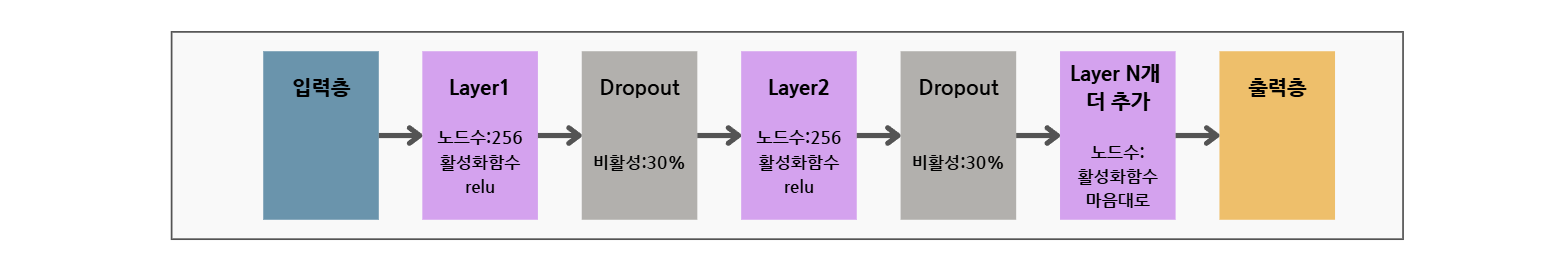

In [ ]:
# 여기에 코드를 작성하세요.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# 랜덤 시드 고정
tf.random.set_seed(100)


model = Sequential()
model.add(Dense(, activation='relu', input_shape=[]))
model.add(Dense(, activation='relu'))
model.add(Dense(, activation='relu'))
model.add(Dense(, activation='relu'))
model.add(Dense(, activation='relu'))
model.add(Dense(, activation=''))


## 학습 방법 설정
model.compile(loss='mse',optimizer='adam',metrics=['mse'])#------->회귀


# EarlyStopping 콜백 설정
early_stop = EarlyStopping(monitor='', patience=)

# ModelCheckpoint 콜백 설정
model_ckp = ModelCheckpoint(
    filepath='best_jajang_model.keras',
    monitor='val_loss',
    save_best_only=True,
)

hist = model.fit(
        X_train_scaled, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_test_scaled, y_test),
        callbacks=[, ],
)

답안02= ''
답안02

### **문제 3. 생성된 `hist` 객체를 사용하여, 학습 과정에 따른 손실(loss) 변화를 시각화하는 코드를 아래 조건에 맞게 작성하시오.**

- 그래프의 전체 크기(`figsize`)는 (15, 6)으로 설정할 것.
- 1행 2열의 subplot을 생성하시오.
- 첫 번째 subplot에는 훈련 손실(`loss`)과 검증 손실(`val_loss`)을 선 그래프로 나타내고, 제목, 축 라벨, 범례를 적절하게 표시
- 두 번째 subplot에는 훈련 평가지표(`mse`)와 검증 평가지표(`val_mse`)를 선 그래프로 나타내고, 제목, 축 라벨, 범례를 적절하게 표시

In [ ]:
# 여기에 코드를 작성하세요.
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history[''],label='train loss')
plt.plot(hist.history[''],label='valid loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history[''],label='mse')
plt.plot(hist.history[''],label='valid mse')
plt.title('MSE')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
